<a href="https://colab.research.google.com/github/rainydayisbright/bicyclez/blob/main/TrainModelForApiFromRoboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install library ที่จำเป็น

In [2]:
!pip install roboflow opencv-python -q
!pip uninstall ultralytics -y
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

# Download datasets ที่ label แล้วจาก Roboflow

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3veRHWgmVVMYkxp5vTOV")
project = rf.workspace("test-mtdkd").project("mangosteen-for-techkud")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mangosteen-for-techkud-2 in yolov8:: 100%|██████████| 3124/3124 [00:04<00:00, 643.12it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Training with YOLOv8

In [4]:
# Download pretrain model
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


In [5]:
# ตรวจสอบ datayaml ก่อน
with open("/content/mangosteen-for-techkud-2/data.yaml", "r") as f:
    print(f.read())


names:
- bloodline
- ripe
- unripe
nc: 3
roboflow:
  license: CC BY 4.0
  project: mangosteen-for-techkud
  url: https://universe.roboflow.com/test-mtdkd/mangosteen-for-techkud/dataset/2
  version: 2
  workspace: test-mtdkd
test: ../test/images
train: ../train/images
val: ../valid/images



In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# กำหนด path ไปยัง data.yaml
path = "/content/mangosteen-for-techkud-2/data.yaml"

# สั่ง train โดยให้ save weights ทุก epoch ลงใน Drive
results = model.train(
    data=path,
    epochs=40,
    imgsz=640,
    save_period=1,  # เซฟทุก epoch
    project="/content/drive/MyDrive/yolo_runs",  # กำหนดให้เซฟเข้า Drive
    name="mangosteen-final-model"  # ชื่อโฟลเดอร์สำหรับรันนี้
)


Mounted at /content/drive
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mangosteen-for-techkud-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=mangosteen-final-model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 197MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 128.2±54.9 MB/s, size: 564.3 KB)


train: Scanning /content/mangosteen-for-techkud-2/train/labels... 1326 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1326/1326 [00:03<00:00, 435.71it/s]

train: New cache created: /content/mangosteen-for-techkud-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 90.3±31.3 MB/s, size: 806.9 KB)


val: Scanning /content/mangosteen-for-techkud-2/valid/labels... 153 images, 0 backgrounds, 0 corrupt: 100%|██████████| 153/153 [00:00<00:00, 392.45it/s]

val: New cache created: /content/mangosteen-for-techkud-2/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolo_runs/mangosteen-final-model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_runs/mangosteen-final-model
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.12G      1.199      2.286      1.351         71        640: 100%|██████████| 83/83 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]

                   all        153        263      0.784      0.543      0.616       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.62G      1.196      1.573      1.284         88        640: 100%|██████████| 83/83 [01:10<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        153        263      0.615      0.564      0.574      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.64G      1.173      1.433      1.281         62        640: 100%|██████████| 83/83 [01:07<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        153        263      0.731      0.628      0.681      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.65G       1.17      1.308      1.279         44        640: 100%|██████████| 83/83 [01:10<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        153        263      0.542      0.525      0.508      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.67G      1.174       1.25      1.269         48        640: 100%|██████████| 83/83 [01:07<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        153        263      0.773      0.634      0.687      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.69G       1.13      1.147      1.239         69        640: 100%|██████████| 83/83 [01:07<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        153        263      0.798      0.612      0.675      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.71G      1.127      1.091      1.228         48        640: 100%|██████████| 83/83 [01:09<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        153        263      0.888      0.618      0.746      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.72G      1.127      1.082      1.234         32        640: 100%|██████████| 83/83 [01:13<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        153        263      0.849      0.635      0.749      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.74G      1.117      1.032      1.231         59        640: 100%|██████████| 83/83 [01:11<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        153        263      0.622      0.567      0.683      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.76G      1.094     0.9947       1.22         72        640: 100%|██████████| 83/83 [01:05<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        153        263      0.857      0.673      0.753       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.77G      1.078     0.9915      1.218         41        640: 100%|██████████| 83/83 [01:12<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        153        263      0.786      0.689       0.77      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.79G      1.054     0.9515      1.197         64        640: 100%|██████████| 83/83 [01:12<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        153        263      0.821      0.659      0.746      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.81G      1.043     0.9391      1.187         39        640: 100%|██████████| 83/83 [01:12<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        153        263      0.763      0.701      0.767      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.82G      1.027     0.8762      1.183         62        640: 100%|██████████| 83/83 [01:12<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        153        263      0.862      0.686       0.78      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.84G      1.034     0.8824      1.186         42        640: 100%|██████████| 83/83 [01:11<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        153        263      0.895      0.668      0.769       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.86G      1.036     0.8576      1.186         69        640: 100%|██████████| 83/83 [01:14<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        153        263      0.865      0.695      0.791      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.88G      1.041     0.8451      1.184        100        640: 100%|██████████| 83/83 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        153        263      0.852      0.673      0.801       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.89G       1.01      0.868      1.171         55        640: 100%|██████████| 83/83 [01:11<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        153        263      0.837       0.71      0.814      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.91G     0.9935     0.8193      1.155         44        640: 100%|██████████| 83/83 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        153        263      0.877      0.725       0.79      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.93G      0.983     0.8134      1.153         78        640: 100%|██████████| 83/83 [01:14<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        153        263      0.902      0.664      0.807      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.95G      0.995     0.8239      1.159         49        640: 100%|██████████| 83/83 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        153        263      0.887      0.682      0.793      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.96G     0.9541     0.7894      1.133         42        640: 100%|██████████| 83/83 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        153        263      0.858      0.692      0.815      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.98G     0.9618     0.7608      1.153         57        640: 100%|██████████| 83/83 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        153        263      0.896        0.7      0.814      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         3G     0.9649     0.7519      1.141         51        640:  60%|██████    | 50/83 [00:45<00:22,  1.47it/s]

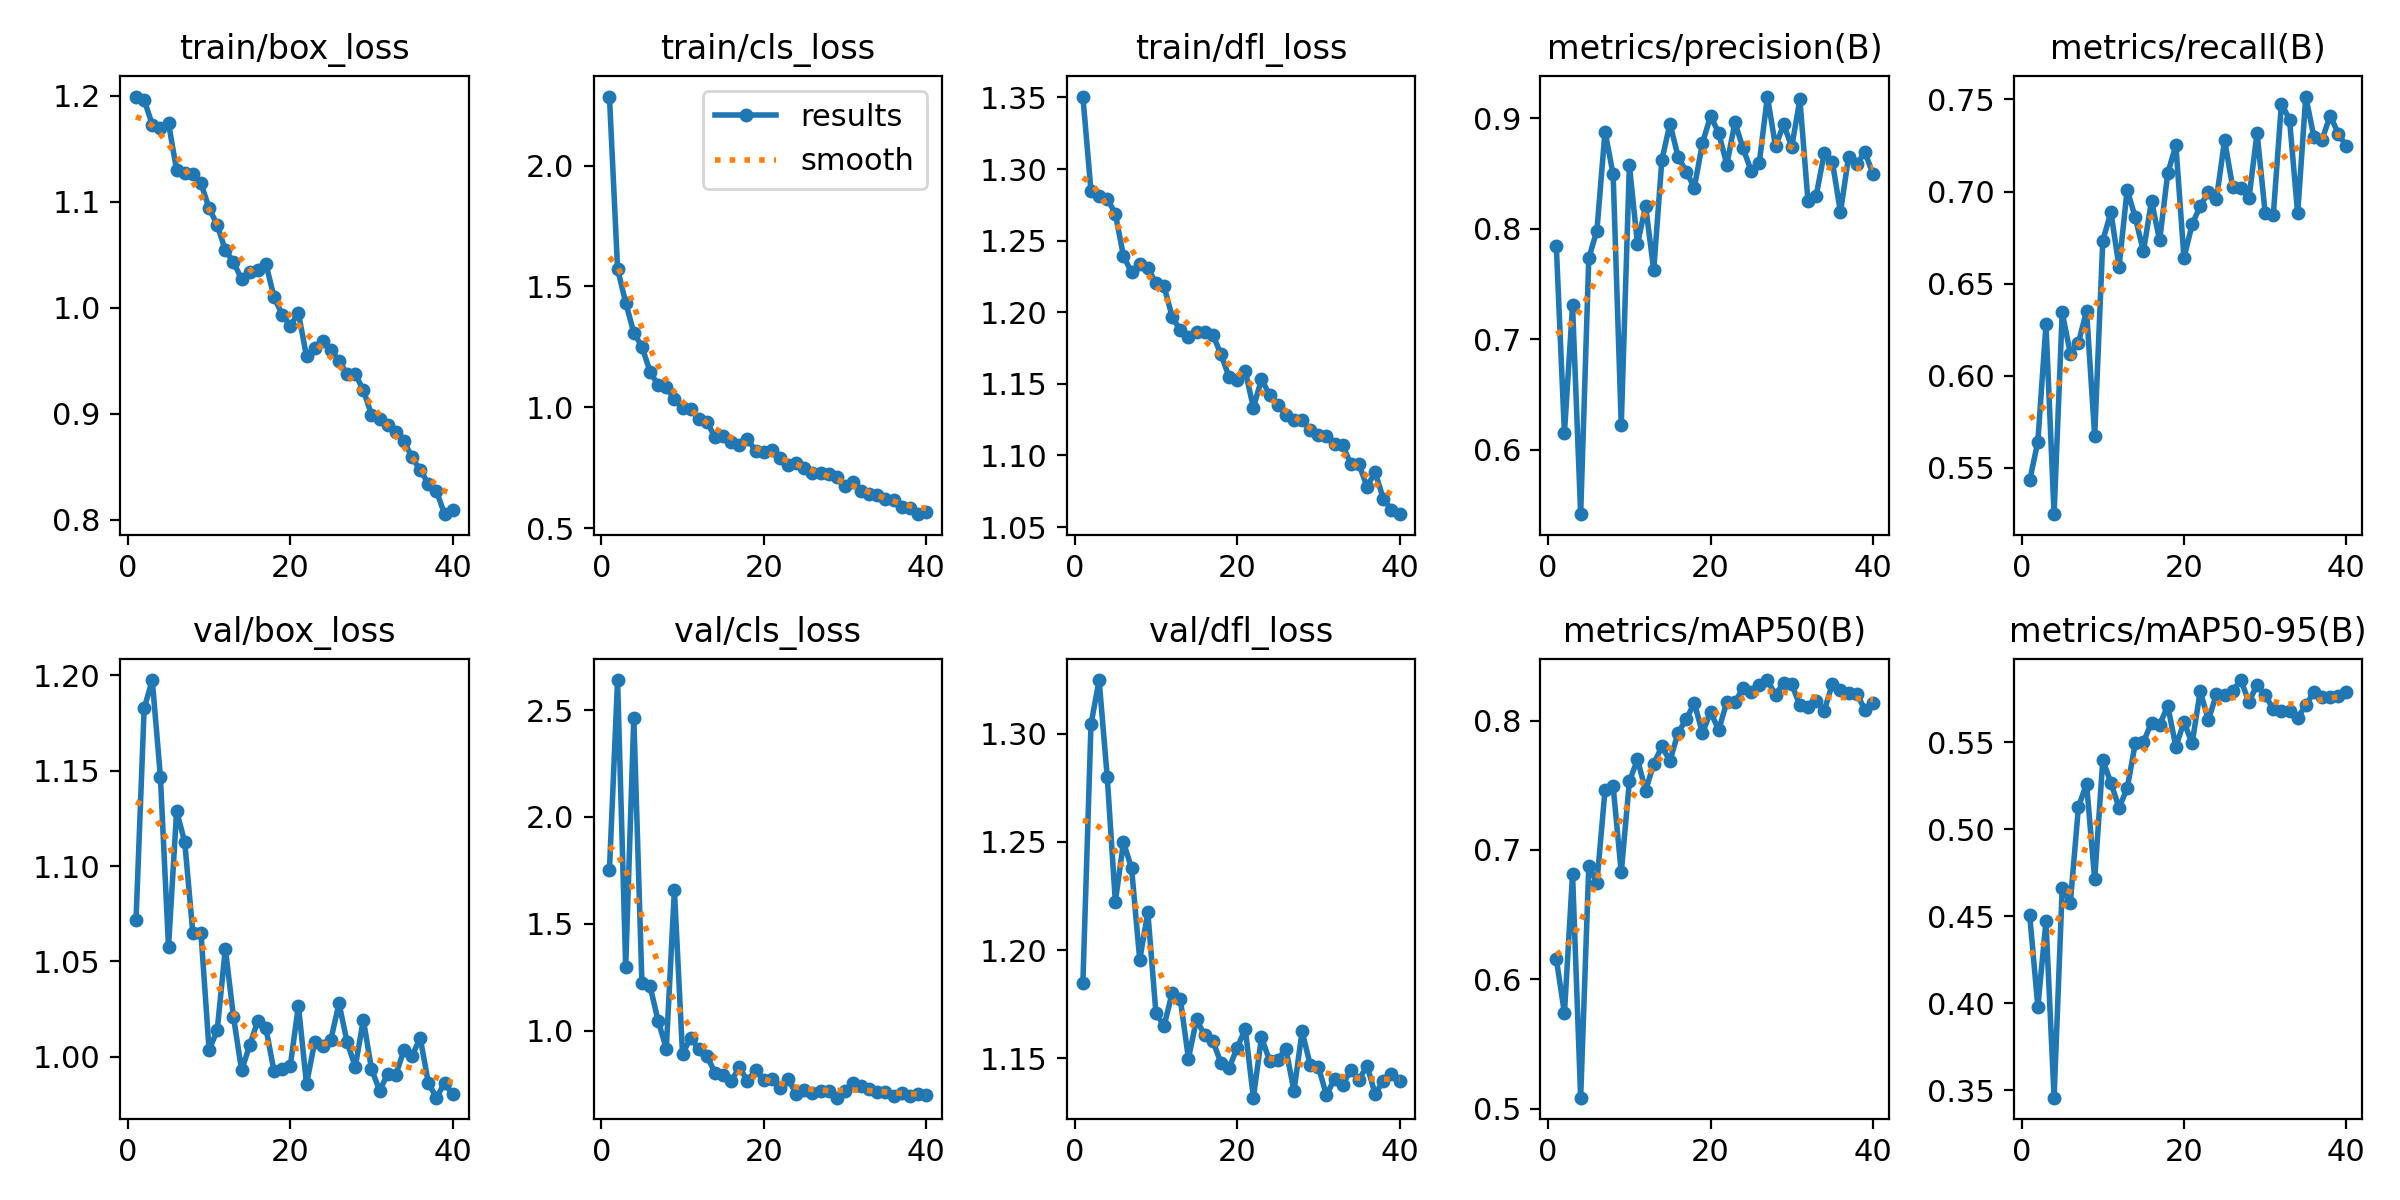

In [6]:
from IPython.display import Image
Image("/content/drive/MyDrive/yolo_runs/mangosteen-final-model/results.png")

In [ ]:
# continue-save-weight
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/epoch22.pt")
path = "/content/mangosteen-for-techkud-2/data.yaml"

results = model.train(
    data=path,
    epochs=40, # จำนวน epochs ใหม่ที่อยากเทรน (จะเทรนต่อจาก checkpoint)
    imgsz=640,
    save_period=1,
    project="/content/drive/MyDrive/yolo_runs",
    name="mangosteen-final-model_resume" # ชื่อ folder ใหม่ เพื่อแยกจากรอบก่อนหน้า
)


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruit-det-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo_runs/fruit_train/weights/epoch39.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fruit_train_resume2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

RuntimeError: Dataset '/content/fruit-det-1/data.yaml' error ❌ '/content/fruit-det-1/data.yaml' does not exist

> Model ที่เราสามรถ download ไปใช้ต่อได้อยู่ที่ /run/detect/train/weights/best.pt
> สามารถอ่านข้อมูลการ Train เพิ่มได้ที่ https://docs.ultralytics.com/modes/train









# Inference custom trained model

In [11]:
# Doc: https://docs.ultralytics.com/modes/predict/
from ultralytics import YOLO

# path ของ model ที่เรา train
custom_model = "/content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/best.pt"

# Load a pretrained YOLO11n model
model = YOLO(custom_model)

# path ของรูปที่เราต้องการจะทำนาย
test_image = "/content/mangosteen-for-techkud-2/test/images/S__120930336_0_jpg.rf.00ac97c18cb1062124747f23792b6d0c.jpg"

model.predict(test_image, save=True, imgsz=640, conf=0.6)


image 1/1 /content/mangosteen-for-techkud-2/test/images/S__120930336_0_jpg.rf.00ac97c18cb1062124747f23792b6d0c.jpg: 640x480 2 unripes, 6.6ms
Speed: 2.7ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bloodline', 1: 'ripe', 2: 'unripe'}
 obb: None
 orig_img: array([[[253, 255, 255],
         [253, 255, 255],
         [253, 255, 255],
         ...,
         [ 54,  71,  68],
         [ 53,  70,  67],
         [ 52,  69,  66]],
 
        [[253, 255, 255],
         [253, 255, 255],
         [253, 255, 255],
         ...,
         [ 54,  71,  68],
         [ 53,  70,  67],
         [ 52,  69,  66]],
 
        [[253, 255, 255],
         [253, 255, 255],
         [253, 255, 255],
         ...,
         [ 53,  70,  67],
         [ 52,  69,  66],
         [ 52,  69,  66]],
 
        ...,
 
        [[ 18,  99,  80],
         [ 19, 100,  81],
         [ 20, 101,  82],
         ...,
         [ 47,  86,  78],
         [ 45,  84,  76],
         [ 44,  83,  75]],
 
        [[ 19, 100,  81],
         [ 20, 101,  82],
         [ 21, 102,  83],
     



> รูปผลลัพธ์ของการทำนายจะอยู่ที่ /content/runs/detect/predict


> สามารถนำผลลัพธ์ไปใช้ต่อได้ด้วย opencv



> สามารถอ่านข้อมูลการ Train เพิ่มได้ที่ https://docs.ultralytics.com/modes/predict


